In [100]:
import pandas as pd


In [101]:
df=pd.read_excel("Raw Data.xlsx")

In [102]:
df.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


In [103]:
#Renaming the columns from the dataframe for comfortable access to data
df.rename(columns = {"SALESPERSON": "SP", 
                     "Old Scheme (in thousands)":"old_scheme","New Scheme (in thousands)":"new_scheme"}, 
                                 inplace = True)

In [104]:
df.head()

,SP,old_scheme,new_scheme
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


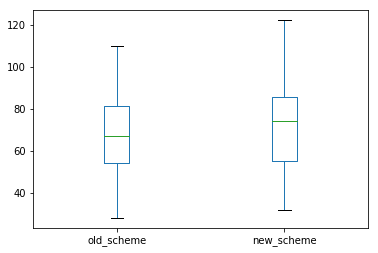

In [40]:
df[["old_scheme","new_scheme"]].describe()
df[["old_scheme","new_scheme"]].plot(kind='box')

In [41]:
#Applying Shapiro's test for normality checking
diff=df["new_scheme"]-df["old_scheme"]
from scipy.stats import shapiro
stat,p=shapiro(diff)
print((stat,p))

(0.9396390914916992, 0.08894602954387665)


In [42]:
#As the p value is 0.08>alpla(0.05), we can say that the data is normally distributed which is a 
#mandatory condition of applying the paired t test

In [45]:
#Using the relative t test to see if we can reject the null hypothesis
from scipy.stats import ttest_rel
stat, p = ttest_rel(df["old_scheme"], df["new_scheme"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-1.556, p=0.131
Same distributions (fail to reject H0)


In [ ]:
#The above 2 sample  t-test can also be converted into the one sample t test if we compute the difference
# and do the calculation

In [47]:
import scipy.stats
diff=df["new_scheme"]-df["old_scheme"]
diff_test_pvalue=scipy.stats.ttest_1samp(diff,0)
print(diff_test_pvalue)

Ttest_1sampResult(statistic=1.5559143823544377, pvalue=0.13057553961337662)


In [ ]:
#Thus we see from the above 2 that we are getting the same p value regardless of which one we are using


In [22]:
#Mean of the old scheme
df["old_scheme"].mean()

68.03333333333333

In [23]:
#Mean of the new scheme
df["new_scheme"].mean()

72.03333333333333

In [24]:
df["old_scheme"].std()

20.455980212074454

In [25]:
df["new_scheme"].std()

24.062394946777697

In [ ]:
#Old Scheme:
#Mean:68.03333333333333
#Standard Deviation:20.455980212074454

#New Scheme
#Mean: 72.03333333333333
#Standard Deviation: 24.062394946777697


In [ ]:
#The null hypothesis in this case is that the New Scheme has no impact on the original revenue
#of the company
#H0: No changes in the revenue(X1=X2)
#Ha: There is a change in the revenue(X2>X1), whcih is a one-tail test and the rejection region lies to the 
#right of the curve


In [29]:
# compare samples to see if there is a change in the values from the old scheme to the new scheme
#Conducting the ttest below:

from scipy.stats import ttest_ind
stat, p = ttest_ind(df["new_scheme"], df["old_scheme"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=0.694, p=0.491
Same distributions (fail to reject H0)


In [44]:
#Using the relative t test to see if we can reject the null hypothesis
from scipy.stats import ttest_rel
stat, p = ttest_rel(df["old_scheme"], df["new_scheme"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-1.556, p=0.131
Same distributions (fail to reject H0)


In [ ]:
#As per the above test, we can say that we are unable to reject the null hypothesis, which is an 
#indicator that the new scheme has not done any considerable change in the outputs

In [30]:
#The conclusion that we reach by seeing the p value, which is lesser than alpha, that means we do not
#have enough evidence to reject the null hypothesis.

In [31]:
#Now given the alternative hypothesis(Ha): Average output must increase by 5000 euros
#The null hypothesis(H0) will thus be that the average output is lesser than 5000 euros


In [32]:
#Calculating the difference between old mean and new mean:
df["new_scheme"].mean()-df["old_scheme"].mean()

4.0

In [33]:
#That means the difference is for 4000 euros right now, average output increase.

In [34]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


In [35]:
#New situation:
#X2-X1>5000: Ha(Alternate Hypothesis)
#X2-X1!=5000: Ho(Null Hypothesis)
import scipy.stats as stats
x = df["old_scheme"]
mu = 68.03333333333333
sd = 20.455980212074454

z_score = (x - mu) / sd

pValue = 1 - stats.norm.cdf(z_score)
pValue

array([0.70518406, 0.043692  , 0.67061017, 0.36671415, 0.21753718,
       0.40408103, 0.94682838, 0.02010623, 0.87997875, 0.24737707,
       0.52014399, 0.57815328, 0.31304942, 0.76880328, 0.9068388 ,
       0.92209536, 0.2792752 , 0.17691285, 0.40408103, 0.55894143,
       0.97482908, 0.61598101, 0.82393177, 0.21753718, 0.59718087,
       0.33057005, 0.52014399, 0.05352552, 0.1307748 , 0.81099471])

In [36]:
x = df["new_scheme"]
mu = 68.03333333333333
sd = 20.455980212074454

z_score = (x - mu) / sd

pValue = 1 - stats.norm.cdf(z_score)
pValue

array([0.61598101, 0.00416755, 0.75365163, 0.24737707, 0.21753718,
       0.18988809, 0.96092361, 0.03935274, 0.92897414, 0.02839631,
       0.21753718, 0.20343246, 0.06503578, 0.92209536, 0.95191732,
       0.68810432, 0.40408103, 0.76880328, 0.53958983, 0.31304942,
       0.9068388 , 0.44234483, 0.92897414, 0.09370532, 0.26307909,
       0.68810432, 0.36671415, 0.10215057, 0.05906098, 0.50065008])

In [ ]:
#In a paired t test, the t values is as below:
#t=m/(s/sqrt(n))
#where m and s is the mean and standard deviation of the difference (before and after)


In [ ]:
## t Test
## Soft dring example

## Null Hypothesis H0: mu = 12 
## Alternate Hypothesis Ha: < 12
## Alpha Threshold : 0.025 (Lower Tail Test)

from math import sqrt
import scipy.stats as stats
mu = 12
n = 30
xbar = 11.88
sd = 0.35
se = sd/sqrt(n)

tstat = (xbar - mu)/se
#df = n-1
#p = (stats.t.cdf(tstat,df=df))
#p

In [105]:
#Calculating the difference cilumn
df["diff"]=df["new_scheme"]-df["old_scheme"]

In [106]:
df.head()

,SP,old_scheme,new_scheme,diff
0,1,57,62,5
1,2,103,122,19
2,3,59,54,-5
3,4,75,82,7
4,5,84,84,0


In [107]:
#Printing the difference column
df["diff"]

0      5
1     19
2     -5
3      7
4      0
5     13
6     -3
7     -6
8     -6
9     25
10    17
11    21
12    21
13   -14
14    -7
15    19
16    -7
17   -34
18    -7
19    13
20    13
21     9
22   -11
23    11
24    18
25   -19
26     8
27    -7
28     9
29    18
Name: diff, dtype: int64

In [108]:
d=df["diff"].mean()

In [109]:
d

4.0

In [110]:
sd=df["diff"].std()

In [111]:
sd

14.08104619937615

In [112]:
se1=sd/sqrt(n)

In [113]:
se1

2.570835545556901

In [114]:
tstat1=d/se1

In [115]:
tstat1

1.5559143823544377

In [137]:
from scipy.stats import ttest_rel
ttest = ttest_rel(df["new_scheme"],df["old_scheme"])
ttest

Ttest_relResult(statistic=1.5559143823544377, pvalue=0.13057553961337662)

In [120]:
#Now we have the situation where we are breaking even at 5000, which is the difference in mean(x1-x2)

In [121]:
d1=5

In [122]:
tstat2=d1/se1

In [123]:
tstat2

1.9448929779430473

In [138]:
#At a tstat2 of 1.94489, we have the p value of 0.061544

In [139]:
#If we say that the alternate hypothesis is the average must increase by 5000(Ha),
#the null hypothesis is that the average must not increase by 5000(Ho)
#as p value is 0.061544 which is more than alpha(0.05), we have no reason to reject the null hypothesis,
#thus we can say that with a 95% confidence, that average has not increased by 5000.

In [140]:
#Probability of a type1 error is alpha, which is 0.05


In [143]:
#Power of Test:(Beta):
# parameters for the analysis 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.87

power_analysis  TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 30.76


In [ ]:
#As we see that the sample size we have is 30, we can have a power of 87% approximately. 